In [1]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline 
from __future__ import division
import os, numpy as np
import matplotlib
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)
import corner
# I changed plotting.py - change to numpy
# om10 changed
import om10
from om10 import plotting

from astropy.table import Table

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Paint the colors

db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
db.select_random(Nlens=200,maglim=30)

om10.DB: selection yields  200  lenses
200


In [3]:
db.paint(synthetic=True, target='lens')
# put color index column in paint

In [4]:
%%capture
# We need only one cornerplot in one notebook, so don't show output by having the command above
matplotlib.rc('text', usetex=False)

fig = om10.plot_sample(db.sample, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

In [5]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

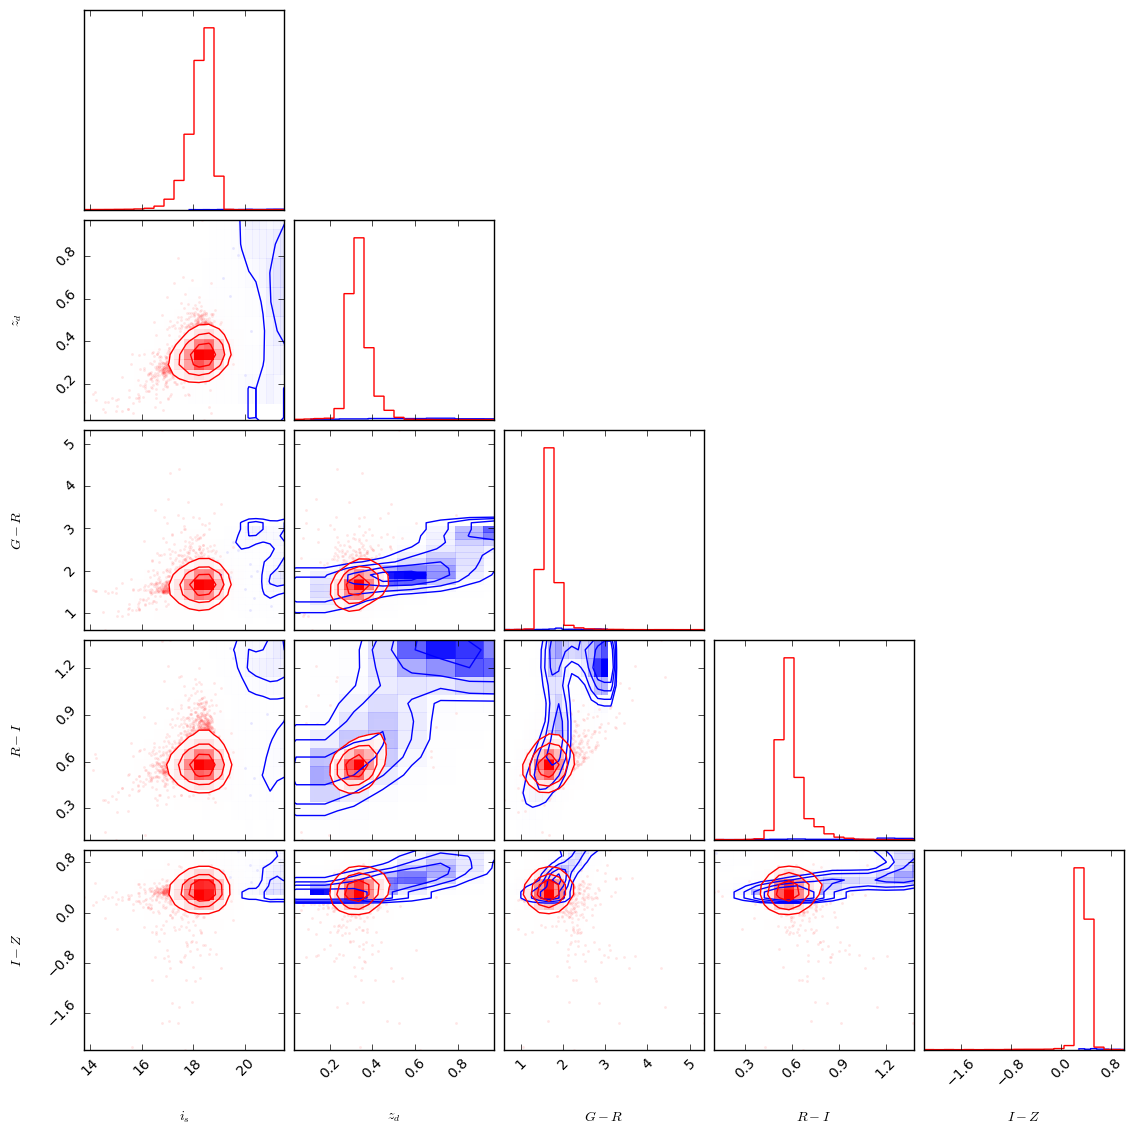

In [6]:
# load the "real" values and overlap it with the previous one
# ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z
table = np.loadtxt('../data/SDSS_LRGs.txt')

table = table[table[:,6]<35]

z = table[:,2]
i = table[:,6]
gr = table[:,4]-table[:,5]
ri = table[:,5]-table[:,6]
iz = table[:,6]-table[:,7]

data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig)